<p style="background-color:#cc0000;color:black;font-size:30px;text-align:center;border-radius:05px 05px;font-weight:bold;border:2px;padding: 10px;">🏠 HP - RandomForest  /</p>

In [1]:
# Import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# Read csv files

In [2]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# na_feat = [i for i in train.columns if train[i].isna().sum() != 0]    
# for i in na_feat:
#     print(i, train[i].isna().sum())

train.isna().sum()[train.isna().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [5]:
train.shape

(1460, 81)

# Let's check which features are the most corelated

In [6]:
train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

<AxesSubplot:>

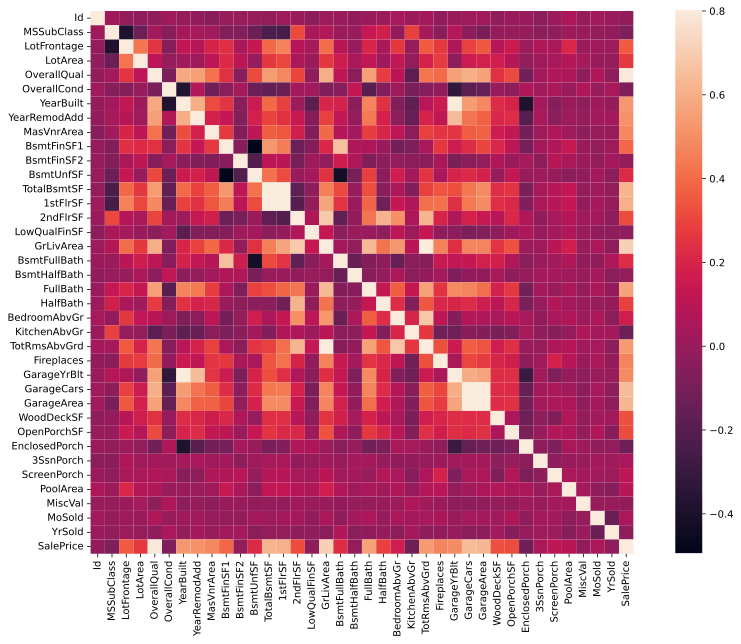

In [7]:
corr_m = train.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_m, vmax=0.8, square=True)

In [8]:
highest_corr_features = corr_m.index[abs(corr_m["SalePrice"])>0.6]
highest_corr_features 

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars',
       'GarageArea', 'SalePrice'],
      dtype='object')

In [9]:
train[highest_corr_features].corr()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice
OverallQual,1.000000,0.537808,0.476224,0.593007,0.600671,0.562022,0.790982
TotalBsmtSF,0.537808,1.000000,0.819530,0.454868,0.434585,0.486665,0.613581
1stFlrSF,0.476224,0.819530,1.000000,0.566024,0.439317,0.489782,0.605852
GrLivArea,0.593007,0.454868,0.566024,1.000000,0.467247,0.468997,0.708624
GarageCars,0.600671,0.434585,0.439317,0.467247,1.000000,0.882475,0.640409
GarageArea,0.562022,0.486665,0.489782,0.468997,0.882475,1.000000,0.623431
SalePrice,0.790982,0.613581,0.605852,0.708624,0.640409,0.623431,1.000000


<AxesSubplot:>

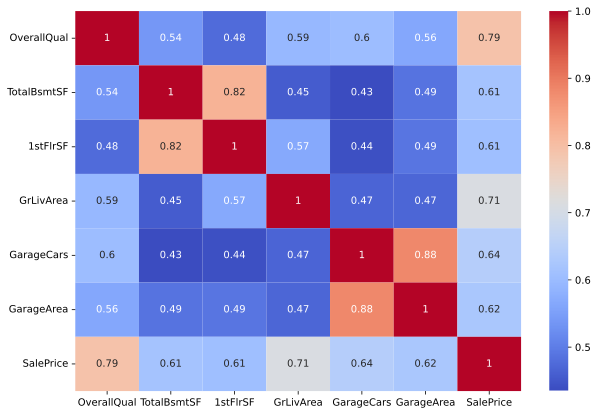

In [10]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(train[highest_corr_features].corr(), annot=True, cmap="coolwarm")

In [11]:
train[highest_corr_features].isnull().sum()

OverallQual    0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
GarageCars     0
GarageArea     0
SalePrice      0
dtype: int64

# Сategorical features

In [12]:
cat_f = train.dtypes[train.dtypes == 'object'].index
train[cat_f].head(3)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [13]:
basic_values = train[cat_f].isna().sum()[train[cat_f].isna().sum() > 0]
basic_values

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [14]:
proc = basic_values / len(train) * 100
proc

Alley           93.767123
MasVnrType       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

### Delete all values where proc NAN more then 10%

In [15]:
cat_val = proc[proc < 10].index
train[cat_val].head(3)

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond
0,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
1,None,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,RFn,TA,TA
2,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA


In [16]:
# train['MasVnrType'].value_counts()
# train['MasVnrType'] = train['MasVnrType'].fillna('None')
# f, ax = plt.subplots(figsize=(10,8))
# train['MasVnrType'].value_counts().plot.bar(ax=ax)
# plt.xlabel('MasVnrType', fontsize = 15)
# plt.ylabel('value counts', fontsize = 15)
# plt.title('MasVnrType value counts', fontsize = 15)

for obj_col in train[cat_val]:
    train[obj_col] = train[obj_col].fillna(train[obj_col].mode()[0])

In [17]:
train[cat_val].isna().sum()

MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [18]:
new_train = pd.concat([train[cat_val], train[highest_corr_features]], axis=1)
new_train.head(3)

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice
0,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,7,856,856,1710,2,548,208500
1,None,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,RFn,TA,TA,6,1262,1262,1262,2,460,181500
2,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,7,920,920,1786,2,608,223500


# Use get_dummies to convert categorical features

In [19]:
new_train = pd.get_dummies(new_train)
new_train.head(3) # 59

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,...,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA
0,7,856,856,1710,2,548,208500,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,6,1262,1262,1262,2,460,181500,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,7,920,920,1786,2,608,223500,0,1,0,...,0,0,0,0,1,0,0,0,0,1


# Train test split

In [20]:
y = new_train['SalePrice']
X = new_train.drop(['SalePrice'], axis=1)
X.shape, y.shape

((1460, 58), (1460,))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=26)

In [22]:
X_train.shape, y_train.shape

((1022, 58), (1022,))

In [23]:
X_test.shape, y_test.shape

((438, 58), (438,))

# Random Forest Regressor

In [24]:
from sklearn.metrics import mean_squared_error

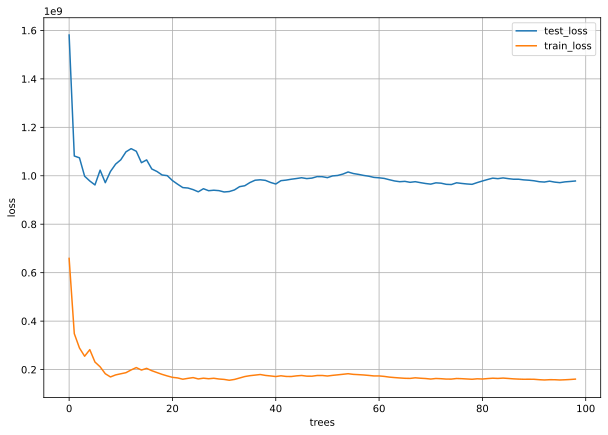

In [25]:
trees = 100
train_loss = []
test_loss = []
for i in range(1, trees):
    rf = RandomForestRegressor(n_estimators = i,random_state = 26)
    rf_fit = rf.fit(X_train, y_train)
    train_loss.append(mean_squared_error(y_train, rf.predict(X_train)))
    test_loss.append(mean_squared_error(y_test, rf.predict(X_test)))

plt.figure(figsize = (10, 7))
plt.grid()
plt.plot(test_loss, label = 'test_loss')
plt.plot(train_loss, label = 'train_loss')
plt.xlabel('trees')
plt.ylabel('loss')
plt.legend();


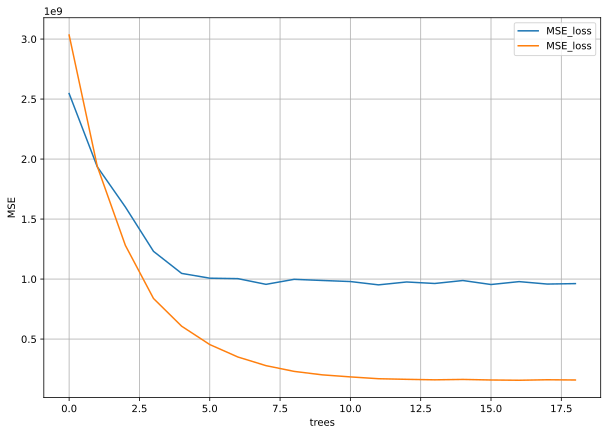

In [26]:
max_depth = 20
train_loss = []
test_loss = []
for i in range(1, max_depth):
    rf = RandomForestRegressor(n_estimators = 80, max_depth = i,random_state = 26)
    rf_fit = rf.fit(X_train, y_train)
    train_loss.append(mean_squared_error(y_train, rf.predict(X_train)))
    test_loss.append(mean_squared_error(y_test, rf.predict(X_test)))

plt.figure(figsize = (10, 7))
plt.grid()
plt.plot(test_loss, label = 'MSE_loss')
plt.plot(train_loss, label = 'MSE_loss')
plt.xlabel('trees')
plt.ylabel('MSE')
plt.legend();

# GridSearchCV

In [27]:
parametrs = { 'n_estimators': range (50, 101, 10),
              'max_depth': range (5,21, 5),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

In [28]:
grid = GridSearchCV(rf, parametrs, cv=5,n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=19, n_estimators=80,
                                             random_state=26),
             n_jobs=-1,
             param_grid={'max_depth': range(5, 21, 5),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(50, 101, 10)})

In [29]:
grid.best_params_

{'max_depth': 20,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 90}

In [30]:
rf = RandomForestRegressor(max_depth = 25,
 min_samples_leaf = 3,
 min_samples_split = 2,
 n_estimators = 90,random_state = 26)

In [31]:
rf_fit = rf.fit(X_train, y_train)

In [32]:
y_pred = rf_fit.predict(X_test)

In [33]:
print(y_pred[:10])

[356506.75994348 129429.80058522 105779.26656806 312380.45780103
 145312.53193122 214899.82725648 109308.13371813 112949.18091871
  96247.50829726 128515.34224387]


# Quality metrics RMSE MAE R2

In [34]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('R2:', np.round(metrics.r2_score(y_test, y_pred), 2))

RMSE: 32715.484883857673
MAE: 19022.611487623653
R2: 0.81
